In [1]:
# Applying the IPF for frequncy modulation similar to the Sound Syntheszis of a Dizi Flute described in "Linke, S., Bader, R., and Mores, R. (2019b). “The impulse pattern formulation (ipf) as a nonlinear model of musical instruments,” in Proceedings of the International Symposium on Music Acoustics 2019 - ISMA 2019, edited by M. Kob, pp. 336–345"

import numpy as np
import pya

import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import IPF_functions as IPF

In [2]:
g0=1 # initial value of IPF
p=[0.45,0.44] #IPF modelling Paramters, where p[0] refers to alpha and p[1:] to the different beta_k

f0=440 #foundamental frequency of the syntesized sound in Hz
dur=2 # approx. duration of the syntesized sound in seconds
mD=4 #modulation Depth

Fs=44100 #sampling rate
it=np.int32(f0*dur) #number of iterations the Ipf is calculateted (equals number of periods of the produced sound)

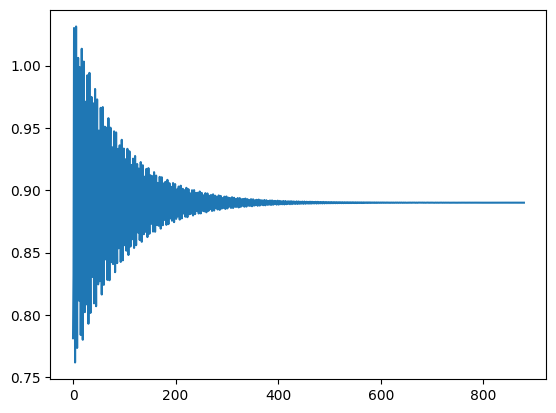

In [3]:
g=IPF.IPF_ser(it,p,g0) # calculate time series of system state g
dg=np.append([0],np.diff(g)) # change of system state

plt.plot(g)

In [4]:
# modulate frequency and Amplitude according to g

out=[0]
T1=0

for i in range(it):

    if dg[i]==dg[i]:

        T=(1+dg[i]*mD)/f0 # modulate the length of each periode

        if T<0.001:
            T=0.001

        c=g[i]
        sig0 = pya.Ugen().sawtooth(freq=1/T, sr=Fs, dur=T, amp=1)

    else:
        T=int(Fs/f0)
        c=0
        sig0 = pya.Asig(T, sr=Fs)

    out=np.append(out,IPF.ampMod(sig0.sig,c))
    # out=np.append(out,IPF.ampMod(sig0.sig,c, han=False))


out=out/np.max(np.abs(out))
atone = pya.Asig(out, sr=Fs)

In [5]:
# export audio
tone=out*(2**15-10)
fname = "Sounds/testFM1.wav"
wavfile.write(fname, Fs, tone.astype(np.int16))

In [6]:
# Optional: Play sound in notebook.
import IPython
IPython.display.Audio(fname)